# Calculate forward propagation & backpropagation

In [26]:
#โครงสร้าง 3 input nodes, 2 hidden nodes, 1 output node
#มี input ชุดเดียว คำนวณ backprop 1 ครั้งเพื่อปรับค่า
#import numpy 
from NNfunction import * # ถ้า import * คือเอาทุก function ในไฟล์ NNfunction

X=([1,0,1,1])
W4=([0.2,0.4,-0.5,-0.4]) #weight ที่เกี่ยวข้องกับ node 4 [w14,w24,w34,bias4]
W5=([-0.3,0.1,0.2,0.2]) #weight ที่เกี่ยวข้องกับ node 5 [w15,w25,w35,bias5]
d6=1 #desire output
l=-0.9 # learning rate
#forward pass
print("\n-----Forward pass-----> ")
o4=Nout(X,W4) #call NNfunction
y4=sigmoid(o4) #call NNfunction
print("\nSum(V) of node 4 is: %8.3f, Y from node 4 is: %8.3f" % (o4,y4))

o5=Nout(X,W5)
y5=sigmoid(o5)
#คำนวน y5
#print ผลลัพธ์
print("\nSum(V) of node 5 is: %8.3f, Y from node 5 is: %8.3f" % (o5,y5))


X6 = ([y4, y5, 1]) # bias = 1
W6 = ([-0.3, -0.2, 0.1]) #weight ที่เกี่ยวข้องกับ node 6 [w46,w56,bias6]
o6 = Nout(X6, W6)
y6 = sigmoid(o6)
print("\nSum(V) of node 6 is: %8.3f, Y from node 6 is: %8.3f" % (o6,y6))
#backpropagation
#node 6
print("\n<---- Back propagation & calculate new Weights and Biases ----")
e6 = d6-y6
g6 = gradOut(e6,y6) #call NNfunction

dw46 = deltaw(l,g6,y4) #call NNfunction
w46n = -0.3+dw46
dw56 = deltaw(l,g6,y5)
w56n = -0.2+dw56
db6 = deltaw(l,g6,1)
b6n = 0.1+db6
print("\nNew w46 is %8.3f, New w56 is:%8.3f, New bias 6 is %8.3f"% (w46n,w56n,b6n))


#node4
#pre gradient4=g6*w46
sumNw = g6 * (-0.3)
g4 = gradH(y4, sumNw)
dw14 = deltaw(l, g4, 1)
w14n = 0.2+dw14
dw24 = deltaw(l, g4, 0)
w24n = 0.4+dw24
dw34 = deltaw(l, g4, 1)
w34n = -0.5+dw34
db4 = deltaw(l, g4, 1)
b4n = -0.4+db4
print("\nNew w14 is %8.3f, New w24 is:%8.3f, New 34 is:%8.3f, New bias 4 is %8.3f"% (w14n,w24n,w34n,b4n))

#node5
#pre gradient5=g6*w56
sumN6w = g6 * (-0.2)
g5 = gradH(y5, sumN6w)
dw15 = deltaw(l, g5, 1)
w15n = -0.3+dw15
dw25 = deltaw(l, g5, 0)
w25n = 0.1+dw24
dw35 = deltaw(l, g5, 1)
w35n = 0.2+dw35
db5 = deltaw(l, g5, 1)
b5n = 0.2+db5

print("\nNew w15 is %8.3f, New w25 is:%8.3f, New 35 is:%8.3f, New bias 5 is %8.3f"% (w15n,w25n,w35n,b5n))


-----Forward pass-----> 

Sum(V) of node 4 is:   -0.700, Y from node 4 is:    0.332

Sum(V) of node 5 is:    0.100, Y from node 5 is:    0.525

Sum(V) of node 6 is:   -0.105, Y from node 6 is:    0.474

<---- Back propagation & calculate new Weights and Biases ----

New w46 is   -0.261, New w56 is:  -0.138, New bias 6 is    0.218

New w14 is    0.192, New w24 is:   0.400, New 34 is:  -0.508, New bias 4 is   -0.408

New w15 is   -0.306, New w25 is:   0.100, New 35 is:   0.194, New bias 5 is    0.194


# For loop iterations

In [3]:
from NNfunction import * # ถ้า import * คือเอาทุก function ในไฟล์ NNfunction

E = []
iterations = []
X=([1,0,1,1]) # input X
W4=([0.2,0.4,-0.5,-0.4]) #weight ที่เกี่ยวข้องกับ node 4 [w14,w24,w34,bias4]
W5=([-0.3,0.1,0.2,0.2]) #weight ที่เกี่ยวข้องกับ node 5 [w15,w25,w35,bias5]

b6n = 1 # init input bias for node 6
W6=([-0.3, -0.2, 0.1])
d6=1 #desire output
l=-0.9 # learning rate

count = 1
e6 = 1

while (e6>=0.1) and (count < 100):
    print("\n-----Forward pass-----> ")
    o4=Nout(X,W4) #call NNfunction
    y4=sigmoid(o4) #call NNfunction
    print("\nSum(V) of node 4 is: %8.3f, Y from node 4 is: %8.3f" % (o4,y4))
    
    o5=Nout(X,W5)
    y5=sigmoid(o5)
    #คำนวน y5
    #print ผลลัพธ์
    print("\nSum(V) of node 5 is: %8.3f, Y from node 5 is: %8.3f" % (o5,y5))
    
    X6 = ([y4, y5, b6n])
    o6 = Nout(X6, W6)
    y6 = sigmoid(o6)
    print("\nSum(V) of node 6 is: %8.3f, Y from node 6 is: %8.3f" % (o6,y6))
    #backpropagation
    #node 6
    
    print(f"\n<---- Round:{count} ---->")
    iterations.append(count)
    count += 1
    print("\n<---- Back propagation & calculate new Weights and Biases ----")
    e6 = d6-y6
    print(f"\n<---- loss: {e6:.3f}")
    E.append(e6)
    g6 = gradOut(e6, y6) #call NNfunction
    
    dw46 = deltaw(l,g6,y4) #call NNfunction
    w46n = W6[0]+dw46
    dw56 = deltaw(l,g6,y5)
    w56n = W6[1]+dw56
    db6 = deltaw(l,g6,W6[2])
    b6n = W6[2]+db6
    
    # Update weight & bias
    W6 = [w46n, w56n, b6n] 
    print("\nNew w46 is %8.3f, New w56 is:%8.3f, New bias 6 is %8.3f"% (w46n,w56n,b6n))
    
    
    #node4
    #pre gradient4=g6*w46
    sumNw = g6 * (W6[0])
    g4 = gradH(y4, sumNw)
    dw14 = deltaw(l, g4, 1)
    w14n = W4[0]+dw14
    dw24 = deltaw(l, g4, 0)
    w24n = W4[1]+dw24
    dw34 = deltaw(l, g4, 1)
    w34n = W4[2]+dw34
    db4 = deltaw(l, g4, 1)
    b4n = W4[3]+db4
    
    W4 = [w14n, w24n, w34n, b4n]
    print("\nNew w14 is %8.3f, New w24 is:%8.3f, New 34 is:%8.3f, New bias 4 is %8.3f"% (w14n,w24n,w34n,b4n))
    
    #node5
    #pre gradient5=g6*w56
    sumN6w = g6 * (W6[1])
    g5 = gradH(y5, sumN6w)
    dw15 = deltaw(l, g5, 1)
    w15n = W5[0]+dw15
    dw25 = deltaw(l, g5, 0)
    w25n = W5[1]+dw24
    dw35 = deltaw(l, g5, 1)
    w35n = W5[2]+dw35
    db5 = deltaw(l, g5, 1)
    b5n = W5[3]+db5
    W5 = [w15n, w25n, w35n, b5n]
    print("\nNew w15 is %8.3f, New w25 is:%8.3f, New 35 is:%8.3f, New bias 5 is %8.3f"% (w15n,w25n,w35n,b5n))


-----Forward pass-----> 

Sum(V) of node 4 is:   -0.700, Y from node 4 is:    0.332

Sum(V) of node 5 is:    0.100, Y from node 5 is:    0.525

Sum(V) of node 6 is:   -0.105, Y from node 6 is:    0.474

<---- Round:1 ---->

<---- Back propagation & calculate new Weights and Biases ----

<---- loss: 0.526

New w46 is   -0.261, New w56 is:  -0.138, New bias 6 is    0.112

New w14 is    0.193, New w24 is:   0.400, New 34 is:  -0.507, New bias 4 is   -0.407

New w15 is   -0.304, New w25 is:   0.100, New 35 is:   0.196, New bias 5 is    0.196

-----Forward pass-----> 

Sum(V) of node 4 is:   -0.720, Y from node 4 is:    0.327

Sum(V) of node 5 is:    0.088, Y from node 5 is:    0.522

Sum(V) of node 6 is:   -0.145, Y from node 6 is:    0.464

<---- Round:2 ---->

<---- Back propagation & calculate new Weights and Biases ----

<---- loss: 0.536

New w46 is   -0.222, New w56 is:  -0.075, New bias 6 is    0.125

New w14 is    0.187, New w24 is:   0.400, New 34 is:  -0.513, New bias 4 is   -0.

## Plotting loss

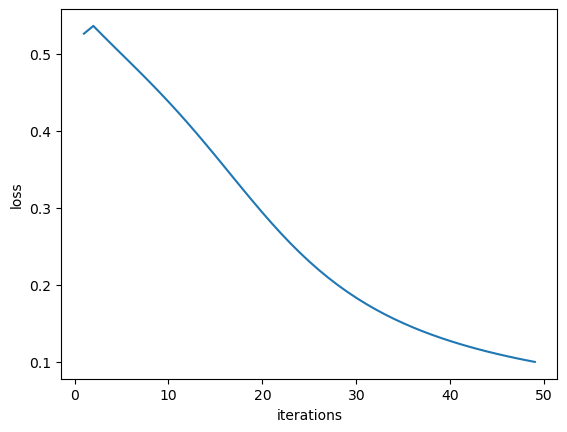

In [4]:
import matplotlib.pyplot as plt

plt.plot(iterations, E)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()